In [1]:
# List all layers in the GPKG
import fiona
import geopandas as gpd
import pandas as pd

In [4]:
layers = fiona.listlayers("dataset/AISVesselTracks2024.gpkg")
print(layers)

['AISVesselTracks2024']


## Load and Explore the Data

In [ ]:
# Load the vessel tracks data using spatial filtering
# This loads only data within a specified geographic bounding box

# Define bounding box (minx, miny, maxx, maxy)
# Based on diagnostic check, your data is in the Western Atlantic/Americas region
# Adjust these coordinates based on your area of interest:
# bbox = (-85.0, 15.0, -60.0, 46.0)  # Western Atlantic, U.S. East Coast & Caribbean
bbox = (-168.0, -60.0, 50.0 , 15.0)  

print(f"Loading data for bounding box: {bbox}")
gdf_sample = gpd.read_file("dataset/AISVesselTracks2024.gpkg", 
                           layer="AISVesselTracks2024", 
                           bbox=bbox)

print(f"\nRecords loaded: {len(gdf_sample):,}")
print(f"Columns: {list(gdf_sample.columns)}")
print(f"CRS: {gdf_sample.crs}")
print(f"Data types:\n{gdf_sample.dtypes}")
print(f"\nActual bounds of loaded data:")
bounds = gdf_sample.total_bounds
print(f"  Min X (West): {bounds[0]:.6f}")
print(f"  Min Y (South): {bounds[1]:.6f}")
print(f"  Max X (East): {bounds[2]:.6f}")
print(f"  Max Y (North): {bounds[3]:.6f}")

Loading data for bounding box: (-168.0, -60.0, 50.0, 15.0)

Records loaded: 1,052
Columns: ['MMSI', 'TrackStartTime', 'TrackEndTime', 'VesselType', 'Length', 'Width', 'Draft', 'DurationMinutes', 'VesselGroup', 'geometry']
CRS: EPSG:4269
Data types:
MMSI                             int32
TrackStartTime     datetime64[ms, UTC]
TrackEndTime       datetime64[ms, UTC]
VesselType                     float64
Length                         float64
Width                          float64
Draft                          float64
DurationMinutes                  int32
VesselGroup                     object
geometry                      geometry
dtype: object

Actual bounds of loaded data:
  Min X (West): -167.841510
  Min Y (South): 11.055240
  Max X (East): -114.000130
  Max Y (North): 15.311910


c:\ProgramData\anaconda3\Lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: Non-conformant content for record 7257216 in column TrackStartTime, 2024-06-01T06:03:29.0Z, successfully parsed
  return ogr_read(


In [3]:
# First check: What geographic area does the dataset actually cover?
# Load a small sample without bbox to see the actual extent
print("Loading sample to check geographic coverage...")
gdf_test = gpd.read_file("dataset/AISVesselTracks2024.gpkg", 
                         layer="AISVesselTracks2024", 
                         rows=slice(0, 10000))

if len(gdf_test) > 0:
    bounds = gdf_test.total_bounds
    print(f"\nSample data geographic bounds:")
    print(f"  Longitude: {bounds[0]:.2f}° to {bounds[2]:.2f}°")
    print(f"  Latitude: {bounds[1]:.2f}° to {bounds[3]:.2f}°")
    print(f"\nThis suggests your data covers approximately:")
    if bounds[0] > -10 and bounds[2] < 50:
        print("  - Likely Mediterranean/European waters")
    elif bounds[0] > 40 and bounds[2] < 100:
        print("  - Likely Arabian Sea/Indian Ocean region")
    elif bounds[0] < -60:
        print("  - Likely includes Atlantic or Americas")
    print(f"\nAdjust your bbox accordingly!")
else:
    print("No data loaded - check file path")

Loading sample to check geographic coverage...


c:\ProgramData\anaconda3\Lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: Non-conformant content for record 1 in column TrackStartTime, 2024-01-12T06:09:32.0Z, successfully parsed
  return ogr_read(



Sample data geographic bounds:
  Longitude: -84.10° to -60.04°
  Latitude: 15.19° to 45.06°

This suggests your data covers approximately:
  - Likely includes Atlantic or Americas

Adjust your bbox accordingly!


In [4]:
# Display first few records from sample
print(gdf_sample.head())

        MMSI            TrackStartTime              TrackEndTime  VesselType  \
0  414647000 2024-06-01 06:03:29+00:00 2024-06-01 06:04:39+00:00        70.0   
1  538008861 2024-05-12 17:01:52+00:00 2024-05-12 17:06:12+00:00        80.0   
2  538008861 2024-05-12 16:41:13+00:00 2024-05-12 16:48:22+00:00        80.0   
3  538008861 2024-05-12 16:31:23+00:00 2024-05-12 16:34:42+00:00        80.0   
4  352001583 2024-09-29 14:19:46+00:00 2024-09-29 14:25:45+00:00        81.0   

   Length  Width  Draft  DurationMinutes VesselGroup  \
0   190.0   32.0   13.0                1       Cargo   
1   228.0   32.0    9.0                4      Tanker   
2   228.0   32.0    9.0                7      Tanker   
3   228.0   32.0    9.0                3      Tanker   
4   299.0   46.0   11.4                5      Tanker   

                                            geometry  
0  MULTILINESTRING ((-124.69375 14.17909, -124.69...  
1  MULTILINESTRING ((-124.6758 13.8528, -124.6864...  
2  MULTILINESTRIN

In [5]:
# Data summary
gdf_sample.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   MMSI             1052 non-null   int32              
 1   TrackStartTime   1052 non-null   datetime64[ms, UTC]
 2   TrackEndTime     1052 non-null   datetime64[ms, UTC]
 3   VesselType       1046 non-null   float64            
 4   Length           1042 non-null   float64            
 5   Width            1042 non-null   float64            
 6   Draft            1034 non-null   float64            
 7   DurationMinutes  1052 non-null   int32              
 8   VesselGroup      1052 non-null   object             
 9   geometry         1052 non-null   geometry           
dtypes: datetime64[ms, UTC](2), float64(4), geometry(1), int32(2), object(1)
memory usage: 74.1+ KB


## Statistical Analysis

In [6]:
# Statistical summary of numerical columns
gdf_sample.describe()

,MMSI,VesselType,Length,Width,Draft,DurationMinutes
count,1.052000e+03,1046.000000,1042.000000,1042.000000,1034.000000,1052.000000
mean,4.540688e+08,75.754302,226.792706,35.673704,10.180174,13.026616
std,1.200963e+08,9.099338,63.855769,9.093022,2.656462,29.064141
min,2.184000e+08,30.000000,10.000000,4.000000,0.000000,0.000000
25%,3.553950e+08,70.000000,190.000000,32.000000,8.500000,2.000000
50%,4.310140e+08,80.000000,228.000000,32.000000,10.100000,5.000000
75%,5.380108e+08,80.000000,290.000000,45.000000,11.900000,12.000000
max,6.360931e+08,90.000000,368.000000,60.000000,19.800000,342.000000


In [7]:
# Check for missing values
missing = gdf_sample.isnull().sum()
missing_pct = (missing / len(gdf_sample)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage': missing_pct})
missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

,Missing Count,Percentage
Draft,18,1.711027
Length,10,0.950570
Width,10,0.950570
VesselType,6,0.570342


## Spatial Analysis

In [8]:
# Geographic bounds of sample data
bounds = gdf_sample.total_bounds
print(f"Bounding Box (sample data):")
print(f"  Min X (West): {bounds[0]:.6f}")
print(f"  Min Y (South): {bounds[1]:.6f}")
print(f"  Max X (East): {bounds[2]:.6f}")
print(f"  Max Y (North): {bounds[3]:.6f}")

Bounding Box (sample data):
  Min X (West): -167.841510
  Min Y (South): 11.055240
  Max X (East): -114.000130
  Max Y (North): 15.311910


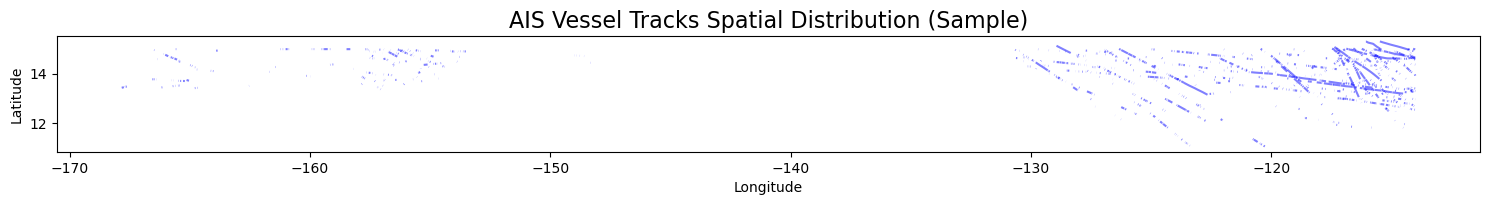

In [9]:
# Visualize spatial distribution of sample
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 10))
gdf_sample.plot(ax=ax, markersize=0.5, alpha=0.5, color='blue')
ax.set_title('AIS Vessel Tracks Spatial Distribution (Sample)', fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.tight_layout()
plt.show()

## Vessel-Specific Analysis

In [10]:
# Count unique vessels (if MMSI column exists)
# Adapt based on actual column names
if 'MMSI' in gdf_sample.columns:
    unique_vessels = gdf_sample['MMSI'].nunique()
    print(f"Total unique vessels (in sample): {unique_vessels:,}")
    print(f"\nTop 10 vessels by number of records:")
    print(gdf_sample['MMSI'].value_counts().head(10))
elif 'mmsi' in gdf_sample.columns:
    unique_vessels = gdf_sample['mmsi'].nunique()
    print(f"Total unique vessels (in sample): {unique_vessels:,}")
    print(f"\nTop 10 vessels by number of records:")
    print(gdf_sample['mmsi'].value_counts().head(10))
else:
    print("MMSI column not found. Available columns:")
    print(gdf_sample.columns.tolist())

Total unique vessels (in sample): 168

Top 10 vessels by number of records:
MMSI
538008861    62
412045240    61
636093018    39
352003070    37
636016376    36
431449000    30
374022000    24
636023708    22
352002496    22
414647000    21
Name: count, dtype: int64


## Temporal Analysis (if timestamp available)

In [11]:
# Check for timestamp columns
time_cols = [col for col in gdf_sample.columns if 'time' in col.lower() or 'date' in col.lower()]
print(f"Time-related columns: {time_cols}")

if time_cols:
    # Convert to datetime if needed
    time_col = time_cols[0]
    if gdf_sample[time_col].dtype == 'object':
        gdf_sample[time_col] = pd.to_datetime(gdf_sample[time_col], errors='coerce')
    
    print(f"\nTime range:")
    print(f"  Start: {gdf_sample[time_col].min()}")
    print(f"  End: {gdf_sample[time_col].max()}")
    print(f"  Duration: {gdf_sample[time_col].max() - gdf_sample[time_col].min()}")

Time-related columns: ['TrackStartTime', 'TrackEndTime']

Time range:
  Start: 2024-01-13 15:50:40+00:00
  End: 2024-12-31 14:19:02+00:00
  Duration: 352 days 22:28:22


## Export Summary Report

In [12]:
# Create a summary report
summary = {
    'Sample Records': len(gdf_sample),
    'Columns': len(gdf_sample.columns),
    'Geometry Type': gdf_sample.geometry.geom_type.unique().tolist(),
    'CRS': str(gdf_sample.crs),
    'Memory Usage (MB)': gdf_sample.memory_usage(deep=True).sum() / 1024**2
}

print("="*50)
print("DATASET SUMMARY (Sample)")
print("="*50)
for key, value in summary.items():
    print(f"{key}: {value}")
print("="*50)

DATASET SUMMARY (Sample)
Sample Records: 1052
Columns: 10
Geometry Type: ['MultiLineString']
CRS: EPSG:4269
Memory Usage (MB): 0.11919403076171875


## Efficient Data Loading Strategies for Large Datasets

In [2]:
# Strategy 1: Load with geographic bounds filter
# Useful if you want to focus on a specific region
# Example: Mediterranean area
# bbox = (8.0, 30.0, 45.0, 46.0)  # (minx, miny, maxx, maxy)
bbox = (-168.0, -60.0, 50.0 , 15.0)  
# gdf_region = gpd.read_file("../dataset/AISVesselTracks2024.gpkg", 
#                              layer="AISVesselTracks2024", 
#                              bbox=bbox)

# Strategy 2: Load data in chunks and process
print("Strategy 2: MMSI based Loading")
MMSI = 414647000 
mmsi_gdf = gpd.read_file("../dataset/AISVesselTracks2024.gpkg", 
                                         layer="AISVesselTracks2024", 
                                         where=f"MMSI = {MMSI}")


Strategy 2: MMSI based Loading


c:\ProgramData\anaconda3\Lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: Non-conformant content for record 6482132 in column TrackStartTime, 2024-09-01T00:00:09.0Z, successfully parsed
  return ogr_read(


In [3]:
mmsi_gdf.head()

,MMSI,TrackStartTime,TrackEndTime,VesselType,Length,Width,Draft,DurationMinutes,VesselGroup,geometry
0,414647000,2024-09-01 00:00:09+00:00,2024-09-01 17:17:19+00:00,70,190.0,32.0,11.7,1037,Cargo,"MULTILINESTRING ((-128.65844 34.49665, -128.65..."
1,414647000,2024-09-01 18:32:48+00:00,2024-09-02 00:06:59+00:00,70,190.0,32.0,11.7,334,Cargo,"MULTILINESTRING ((-125.38783 32.51578, -125.38..."
2,414647000,2024-09-02 01:00:19+00:00,2024-09-02 01:05:00+00:00,70,190.0,32.0,11.7,4,Cargo,"MULTILINESTRING ((-124.25712 31.78591, -124.25..."
3,414647000,2024-09-02 02:00:09+00:00,2024-09-02 05:10:40+00:00,70,190.0,32.0,11.7,190,Cargo,"MULTILINESTRING ((-124.08408 31.6714, -124.080..."
4,414647000,2024-09-02 05:15:49+00:00,2024-09-02 12:45:29+00:00,70,190.0,32.0,11.7,449,Cargo,"MULTILINESTRING ((-123.55293 31.30969, -123.54..."


In [5]:
# download data for the specified MMSI
mmsi_gdf

,MMSI,TrackStartTime,TrackEndTime,VesselType,Length,Width,Draft,DurationMinutes,VesselGroup,geometry
0,414647000,2024-09-01 00:00:09+00:00,2024-09-01 17:17:19+00:00,70,190.0,32.0,11.7,1037,Cargo,"MULTILINESTRING ((-128.65844 34.49665, -128.65..."
1,414647000,2024-09-01 18:32:48+00:00,2024-09-02 00:06:59+00:00,70,190.0,32.0,11.7,334,Cargo,"MULTILINESTRING ((-125.38783 32.51578, -125.38..."
2,414647000,2024-09-02 01:00:19+00:00,2024-09-02 01:05:00+00:00,70,190.0,32.0,11.7,4,Cargo,"MULTILINESTRING ((-124.25712 31.78591, -124.25..."
3,414647000,2024-09-02 02:00:09+00:00,2024-09-02 05:10:40+00:00,70,190.0,32.0,11.7,190,Cargo,"MULTILINESTRING ((-124.08408 31.6714, -124.080..."
4,414647000,2024-09-02 05:15:49+00:00,2024-09-02 12:45:29+00:00,70,190.0,32.0,11.7,449,Cargo,"MULTILINESTRING ((-123.55293 31.30969, -123.54..."
...,...,...,...,...,...,...,...,...,...,...
94,414647000,2024-03-28 13:29:33+00:00,2024-03-28 13:33:23+00:00,70,190.0,32.0,12.8,3,Cargo,"MULTILINESTRING ((-119.6278 25.235, -119.62421..."
95,414647000,2024-03-28 14:03:52+00:00,2024-03-28 14:05:03+00:00,70,190.0,32.0,12.8,1,Cargo,"MULTILINESTRING ((-119.52035 25.18845, -119.51..."
96,414647000,2024-03-28 18:08:33+00:00,2024-03-28 18:13:33+00:00,70,190.0,32.0,12.8,5,Cargo,"MULTILINESTRING ((-118.75328 24.85991, -118.74..."
97,414647000,2024-03-28 18:39:12+00:00,2024-03-28 18:40:52+00:00,70,190.0,32.0,12.8,1,Cargo,"MULTILINESTRING ((-118.65889 24.81571, -118.65..."


In [11]:
mmsi_gdf.geometry.name

'geometry'

In [6]:
mmsi_gdf.to_parquet(
    "mmsi_gdf_414647000.parquet",
    compression="zstd"
)


In [8]:
mmsi_gdf = gpd.read_parquet("mmsi_gdf_414647000.parquet")


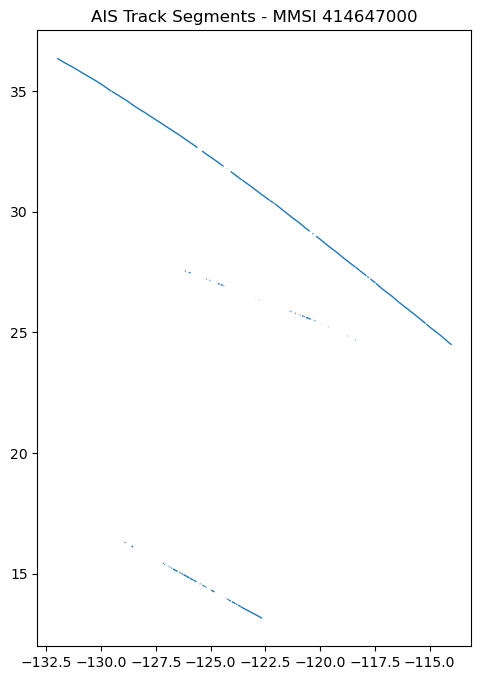

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 8))
mmsi_gdf.plot(ax=ax, linewidth=1)
ax.set_title("AIS Track Segments - MMSI 414647000")
plt.show()


In [ ]:
import fiona
import geopandas as gpd
import os

# Path to the GPKG file
gpkg_path = "dataset/AISVesselTracks2024.gpkg"
output_dir = "dataset"
output_parquet = os.path.join(output_dir, "AISVesselTracks2024.parquet")

# List all layers in the GPKG
layers = fiona.listlayers(gpkg_path)
print(f"Layers in GPKG: {layers}")

# Read all layers and combine them
gdfs = []
for layer in layers:
    print(f"Reading layer: {layer}")
    gdf = gpd.read_file(gpkg_path, layer=layer)
    gdf['layer'] = layer  # Add layer name as a column to track source
    gdfs.append(gdf)

# Combine all layers
combined_gdf = gpd.GeoDataFrame(pd.concat(gdfs, ignore_index=True))

# Convert geometry to WKT (Well-Known Text) format for parquet compatibility
combined_gdf['geometry_wkt'] = combined_gdf['geometry'].astype(str)
combined_gdf = combined_gdf.drop('geometry', axis=1)

# Save to parquet
combined_gdf.to_parquet(output_parquet, index=False)
print(f"✓ Successfully converted GPKG to Parquet")
print(f"  Output file: {output_parquet}")
print(f"  Total rows: {len(combined_gdf)}")
print(f"  Columns: {list(combined_gdf.columns)}")

Layers in GPKG: ['AISVesselTracks2024']
Reading layer: AISVesselTracks2024


c:\ProgramData\anaconda3\Lib\site-packages\pyogrio\raw.py:200: RuntimeWarning: Non-conformant content for record 1 in column TrackStartTime, 2024-01-12T06:09:32.0Z, successfully parsed
  return ogr_read(
